In [1]:
#import of all the necessary libraries 
import regex as re
import tarfile
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from spacy.tokenizer import Tokenizer
from spacy.lang.pl import Polish
from collections import Counter
# from google.colab import files
# uploaded = files.upload() #importing tar file

In [6]:
# open file
tar = tarfile.open('ustawy.tar.gz')
  
# extracting file
tar.extractall('/content/acts')
bills = [tarinfo.name for tarinfo in tar]  
print(bills[0])
tar.close()

1993_599.txt


Helpful functions

In [7]:
def cleanhtml(raw_html):
  cleantext = re.sub(r'<.*?>', "", raw_html)
  return cleantext

In [8]:
def clean_text(line):
    line = re.sub(r"[^\w]", " ", line)
    line = re.sub(r"[0-9]", " ", line)
    line = re.sub(r"\br\b", " ", line)
    line = re.sub(r"\s\s+", " ", line)
    line = line.lower()
    
    return line

# Task 1
Make sure the texts in the corpus does not contain HTML code.

In [9]:
for file_name in bills:
  with open(f'./acts/{file_name}', 'r+') as file:
    f = file.read()
    f = cleanhtml(f)

    file.seek(0)
    file.truncate()

    file.write(f)

# Task 3

Use SpaCy tokenizer API to tokenize the text from the cleaned law corpus.

In [11]:
nlp = Polish()
tokenizer = Tokenizer(nlp.vocab)
tokenized_bills = defaultdict()

for file_name in bills:
  with open(f'./acts/{file_name}') as file:
    content = file.read()
    cleaned_text = clean_text(content)
    tokens = tokenizer(cleaned_text)
    tokenized_bills[file_name] = [token for token in tokens if not str(token).startswith('_') and len(str(token))>=2]

In [12]:
print(tokenized_bills['2001_1381.txt'])

[dz, nr, poz, ustawa, dnia, września, prawo, farmaceutyczne, rozdział, przepisy, ogólne, art, ustawa, określa, zasady, tryb, dopuszczania, do, obrotu, produktów, leczniczych, uwzględnieniem, szczególności, wymagań, dotyczących, jakości, skuteczności, bezpieczeństwa, ich, stosowania, warunki, wytwarzania, produktów, leczniczych, wymagania, dotyczące, reklamy, produktów, leczniczych, warunki, obrotu, produktami, leczniczymi, wymagania, dotyczące, aptek, hurtowni, farmaceutycznych, placówek, obrotu, pozaaptecznego, zadania, inspekcji, farmaceutycznej, uprawnienia, jej, organów, przepisy, ustawy, stosuje, się, również, do, produktów, leczniczych, będących, środkami, odurzającymi, substancjami, psychotropowymi, prekursorami, rozumieniu, przepisów, przeciwdziałaniu, narkomanii, zakresie, nie, uregulowanym, tymi, przepisami, art, rozumieniu, ustawy, aktywnością, biologiczną, produktu, leczniczego, jest, siła, działania, jego, substancji, czynnej, lub, substancji, czynnych, wyrażona, jednostka

# Task 4

Compute frequency list for each of the processed files.

In [13]:
frequency_list = defaultdict()

for file_name in tokenized_bills.keys():
  tokens = tokenized_bills[file_name]
  x = [str(i) for i in tokens]
  ctr = Counter(x)
  frequency_list[file_name] = ctr

In [14]:
print(frequency_list['2004_1136.txt'])
print(frequency_list['2004_1136.txt']['w'])
print(frequency_list['2004_1136.txt']['na'])

Counter({'ust': 54, 'mowa': 36, 'art': 33, 'na': 32, 'do': 28, 'środka': 24, 'trwałego': 24, 'od': 18, 'się': 18, 'której': 18, 'którym': 16, 'środków': 16, 'przychodów': 15, 'poczet': 14, 'nabycia': 14, 'odpisów': 14, 'trwałych': 14, 'dnia': 12, 'amortyzacyjnych': 12, 'odpisu': 12, 'kosztów': 10, 'uzyskania': 10, 'zł': 10, 'amortyzacyjnego': 10, 'albo': 10, 'podatku': 8, 'wpłaty': 8, 'wartości': 8, 'roku': 8, 'podatkowym': 8, 'jednorazowego': 8, 'dzień': 8, 'ustawy': 7, 'przez': 7, 'ustawie': 7, 'których': 7, 'przed': 7, 'zd': 7, 'poz': 6, 'po': 6, 'brzmieniu': 6, 'przypadku': 6, 'wpłatę': 6, 'nabytych': 6, 'zaliczonej': 6, 'wartość': 6, 'początkowa': 6, 'co': 6, 'najmniej': 6, 'lub': 6, 'dokonanych': 6, 'odpowiednio': 6, 'podatnik': 6, 'opodatkowania': 6, 'dochodowym': 5, 'osób': 5, 'oraz': 5, 'prawnych': 5, 'podatnicy': 5, 'wysokości': 5, 'kwotę': 5, 'lipca': 4, 'dz': 4, 'zmiany': 4, 'dodaje': 4, 'dokonania': 4, 'fabrycznie': 4, 'którego': 4, 'mogą': 4, 'kwoty': 4, 'początkowej': 4,

# Task 5

Aggregate the result to obtain one global frequency list.

In [15]:
global_frequency_list = defaultdict()

for file_name in frequency_list.keys():
  tokens = frequency_list[file_name].keys()
  for token in tokens:
    if token in global_frequency_list.keys():
      global_frequency_list[token] += frequency_list[file_name][token]
    else:
      global_frequency_list[token] = frequency_list[file_name][token]



In [16]:
print(global_frequency_list)

defaultdict(None, {'dz': 8888, 'nr': 44955, 'poz': 45245, 'ustawa': 3235, 'dnia': 17955, 'grudnia': 2119, 'zmianie': 1518, 'ustawy': 13101, 'podatku': 2049, 'od': 16697, 'towarów': 1921, 'usług': 1629, 'oraz': 33566, 'akcyzowym': 91, 'art': 83806, 'ustawie': 5478, 'stycznia': 1896, 'wprowadza': 2001, 'się': 45887, 'następujące': 2276, 'zmiany': 4016, 'dotychczasowa': 50, 'treść': 486, 'otrzymuje': 9840, 'oznaczenie': 556, 'ust': 53640, 'dodaje': 8428, 'brzmieniu': 7295, 'rada': 2000, 'ministrów': 2425, 'może': 12096, 'określać': 357, 'drodze': 7179, 'rozporządzenia': 5338, 'towary': 589, 'usługi': 1026, 'wyjątkiem': 1690, 'wyrobów': 1471, 'akcyzowych': 481, 'metali': 89, 'szlachetnych': 33, 'do': 60770, 'których': 17932, 'nie': 23008, 'stosuje': 6680, 'przepisów': 5344, 'pkt': 19126, 'wyrazy': 5818, 'użytkowania': 466, 'wynosi': 660, 'zastępuje': 4818, 'wyrazami': 3158, 'używania': 528, 'wyniósł': 7, 'kropkę': 770, 'średnikiem': 175, 'pozostałych': 518, 'przypadkach': 1703, 'właściwym'

In [17]:
#sorting
sorted_frequency_list = {val[0] : val[1] for val in sorted(global_frequency_list.items(), key = lambda x: (-x[1], x[0]))}
print(sorted_frequency_list)

{'art': 83806, 'do': 60770, 'ust': 53640, 'na': 50665, 'się': 45887, 'lub': 45800, 'poz': 45245, 'nr': 44955, 'oraz': 33566, 'mowa': 28783, 'nie': 23008, 'przez': 20956, 'pkt': 19126, 'dnia': 17955, 'których': 17932, 'od': 16697, 'po': 13568, 'jest': 13197, 'ustawy': 13101, 'może': 12096, 'jeżeli': 12047, 'którym': 11789, 'za': 11188, 'brzmienie': 10576, 'spraw': 10025, 'otrzymuje': 9840, 'dz': 8888, 'albo': 8708, 'dodaje': 8428, 'ich': 8199, 'dla': 7937, 'pracy': 7633, 'minister': 7582, 'której': 7476, 'brzmieniu': 7295, 'drodze': 7179, 'podstawie': 6850, 'stosuje': 6680, 'przypadku': 6494, 'niż': 6453, 'tym': 6367, 'jego': 6320, 'są': 6157, 'być': 6120, 'zakresie': 6098, 'właściwy': 6094, 'państwa': 5839, 'przepisy': 5839, 'wyrazy': 5818, 'ze': 5511, 'ustawie': 5478, 'także': 5447, 'przepisów': 5344, 'rozporządzenia': 5338, 'tych': 5048, 'określonych': 5043, 'osób': 4904, 'postępowania': 4901, 'terminie': 4825, 'zastępuje': 4818, 'działalności': 4744, 'przed': 4704, 'ochrony': 4606, 

In [18]:
#assigning a rank to every token
rank_dict = {(a,b):c for c, (a, b) in enumerate(sorted_frequency_list.items())}
print(rank_dict)

{('art', 83806): 0, ('do', 60770): 1, ('ust', 53640): 2, ('na', 50665): 3, ('się', 45887): 4, ('lub', 45800): 5, ('poz', 45245): 6, ('nr', 44955): 7, ('oraz', 33566): 8, ('mowa', 28783): 9, ('nie', 23008): 10, ('przez', 20956): 11, ('pkt', 19126): 12, ('dnia', 17955): 13, ('których', 17932): 14, ('od', 16697): 15, ('po', 13568): 16, ('jest', 13197): 17, ('ustawy', 13101): 18, ('może', 12096): 19, ('jeżeli', 12047): 20, ('którym', 11789): 21, ('za', 11188): 22, ('brzmienie', 10576): 23, ('spraw', 10025): 24, ('otrzymuje', 9840): 25, ('dz', 8888): 26, ('albo', 8708): 27, ('dodaje', 8428): 28, ('ich', 8199): 29, ('dla', 7937): 30, ('pracy', 7633): 31, ('minister', 7582): 32, ('której', 7476): 33, ('brzmieniu', 7295): 34, ('drodze', 7179): 35, ('podstawie', 6850): 36, ('stosuje', 6680): 37, ('przypadku', 6494): 38, ('niż', 6453): 39, ('tym', 6367): 40, ('jego', 6320): 41, ('są', 6157): 42, ('być', 6120): 43, ('zakresie', 6098): 44, ('właściwy', 6094): 45, ('państwa', 5839): 46, ('przepisy'

In [19]:
occurence_list = [occurence[1] for occurence in rank_dict.keys()]
occurence_list[:6]

[83806, 60770, 53640, 50665, 45887, 45800]

# Task 7

Make a plot in a logarithmic scale (for X and Y)

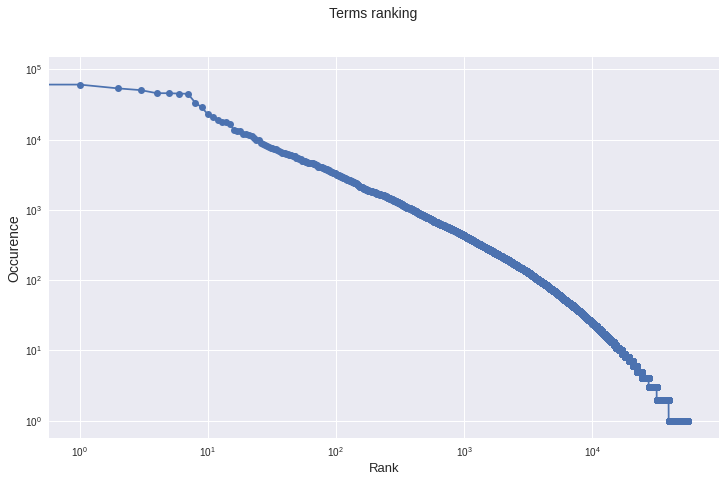

In [20]:
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(7)
plt.style.use('seaborn')

plt.plot(list(rank_dict.values()),occurence_list, marker ='o')

plt.suptitle('Terms ranking', fontsize=14)
plt.xlabel('Rank', fontsize = 13)
plt.ylabel('Occurence', fontsize = 14)
plt.xscale("log")
plt.yscale('log')
plt.show()

# Task 8

Install Morfeusz (Binding dla Pythona) and use it to find all words that do not appear in that dictionary.

In [21]:
!pip install morfeusz2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.5 MB 14.9 MB/s 


In [22]:
import morfeusz2
morf = morfeusz2.Morfeusz(aggl="isolated")

def is_unknown(word):
    n1, n2, (word, base, tag, _, _) = morf.analyse(word)[0]
    return tag == "ign"


In [25]:
words_unknown = [
    (word, count)
    for (word, count) in sorted_frequency_list.items()
    if is_unknown(word=word)
]

# Task 9

 Find 30 words with the highest ranks that do not belong to the dictionary.

In [26]:
words_unknown = sorted(words_unknown, key=lambda item: item[1], reverse=True)

words_unknown_30_dict = words_unknown[:30]

words_unknown_30 = [word[0] for word in words_unknown[:30]]
print(words_unknown_30)

['późn', 'gmo', 'sww', 'skw', 'ex', 'ike', 'remediacji', 'ure', 'uke', 'kn', 'cn', 'pkwiu', 'udt', 'bswsg', 'bswp', 'biobójczych', 'phs', 'hcfc', 'fep', 'mgo', 'utk', 'frd', 'ron', 'uokik', 'cbśp', 'doke', 'haccp', 'pcn', 'vitro', 'iia']


# Task 10

Find 30 random words (i.e. shuffle the words) with 5 occurrences that do not belong to the dictionary.

In [27]:
words_unknown_5 = [(word, count) for word, count in words_unknown if count == 5][:30]
words_unknown_5

words_unknown_5_list = [word[0] for word in words_unknown_5]

In [28]:
print(words_unknown_5_list)

['agave', 'ah', 'ami', 'bd', 'betezda', 'bowego', 'cego', 'chelatującym', 'cji', 'contagious', 'cyjne', 'cza', 'cznika', 'czonych', 'czonym', 'członkow', 'denitracyjne', 'difenylopropylo', 'dowej', 'dowych', 'dzialności', 'eudravigilance', 'heptanol', 'inci', 'instrumen', 'jwh', 'kj', 'kow', 'kowskich', 'kowskiego']


# Task 11

Use Levenshtein distance and the frequency list, to determine the most probable correction of the words from lists defined in points 8 and 9. 

In [30]:
unknown_words_list = [word[0] for word in words_unknown]
print(unknown_words_list)

['późn', 'gmo', 'sww', 'skw', 'ex', 'ike', 'remediacji', 'ure', 'uke', 'kn', 'cn', 'pkwiu', 'udt', 'bswsg', 'bswp', 'biobójczych', 'phs', 'hcfc', 'fep', 'mgo', 'utk', 'frd', 'ron', 'uokik', 'cbśp', 'doke', 'haccp', 'pcn', 'vitro', 'iia', 'its', 'metylo', 'inulinowego', 'efrrow', 'fenylo', 'cu', 'nia', 'pcb', 'plk', 'ureaformu', 'biuretu', 'tdt', 'ych', 'disease', 'czenia', 'bankowania', 'hydroksy', 'iva', 'prefinansowanie', 'rozpuszc', 'wym', 'wymienion', 'difenylo', 'iiia', 'metylomorfinan', 'ureaform', 'wych', 'cao', 'zalny', 'zn', 'abw', 'dimetyloamino', 'npk', 'szcze', 'wdt', 'chelatującego', 'efrg', 'epoksy', 'etylo', 'iib', 'marpol', 'ności', 'ny', 'wpowinno', 'bovine', 'epuap', 'ktrych', 'odpo', 'piperydynokarboksylowego', 'solas', 'alny', 'amonow', 'azotanow', 'gólności', 'infectious', 'mie', 'nastawów', 'propionanilid', 'rasff', 'rozpuszczaln', 'wo', 'zawartoś', 'how', 'know', 'nusp', 'orga', 'piperydylo', 'remediacja', 'rozpuszcz', 'vitis', 'wymiarz', 'zawo', 'zb', 'cuvée', '

In [31]:
word_list = [word for word in list(sorted_frequency_list.keys()) if word not in unknown_words_list]
print(word_list)

['art', 'do', 'ust', 'na', 'się', 'lub', 'poz', 'nr', 'oraz', 'mowa', 'nie', 'przez', 'pkt', 'dnia', 'których', 'od', 'po', 'jest', 'ustawy', 'może', 'jeżeli', 'którym', 'za', 'brzmienie', 'spraw', 'otrzymuje', 'dz', 'albo', 'dodaje', 'ich', 'dla', 'pracy', 'minister', 'której', 'brzmieniu', 'drodze', 'podstawie', 'stosuje', 'przypadku', 'niż', 'tym', 'jego', 'są', 'być', 'zakresie', 'właściwy', 'państwa', 'przepisy', 'wyrazy', 'ze', 'ustawie', 'także', 'przepisów', 'rozporządzenia', 'tych', 'określonych', 'osób', 'postępowania', 'terminie', 'zastępuje', 'działalności', 'przed', 'ochrony', 'osoby', 'wniosek', 'innych', 'że', 'urzędu', 'sposób', 'odpowiednio', 'prawa', 'życie', 'środków', 'które', 'czynności', 'rady', 'polskiej', 'tego', 'zmiany', 'prawo', 'roku', 'mogą', 'informacji', 'służby', 'organ', 'dni', 'przy', 'to', 'jej', 'określi', 'rzeczypospolitej', 'co', 'dniem', 'szczególności', 'umowy', 'decyzji', 'jednostki', 'celu', 'wysokości', 'środowiska', 'ustawa', 'kontroli', 'wyr

In [54]:
# !pip install levenshtein
# from Levenshtein import distance

def determine_word_correction(word, word_list=word_list):
  temp_dict = {}
  
  for freq_word in word_list:
    temp_dict[freq_word] = distance(word, freq_word)

  temp_dict = {key:value for (key,value) in sorted(temp_dict.items(), key=lambda x:x[1])}

  min_value = min(temp_dict.values())
  result = [key for key, val in temp_dict.items() if val == min_value]

  return result

def find_corrections(words_to_correct):
  result = defaultdict(lambda: [])

  for word in words_to_correct:
    result[word] = determine_word_correction(word)

  return result

In [71]:
corrections_words_5 = find_corrections(words_unknown_5_list)

for k,v in corrections_words_5.items():
  print(f'The corrections for {k} are: {v}')




The corrections for agave are: ['agape']
The corrections for ah are: ['aż', 'aa', 'ar', 'ch', 'ab', 'ac', 'ad', 'af', 'at', 'am', 'ph', 'oh', 'ach', 'ag', 'al', 'au']
The corrections for ami are: ['ani', 'mi', 'sami', 'am', 'amid', 'asi', 'mami', 'wami']
The corrections for bd are: ['od', 'ba', 'by', 'bo', 'bud', 'ad', 'bz', 'be', 'br', 'bu', 'nd']
The corrections for betezda are: ['betel', 'metoda', 'beta', 'butelka']
The corrections for bowego are: ['nowego']
The corrections for cego are: ['jego', 'tego', 'czego', 'nego', 'wego', 'ego', 'mego', 'celo', 'rego']
The corrections for chelatującym are: ['chorującym', 'reklamującym', 'kredytującym', 'ratującym', 'uchylającym', 'emitującym']
The corrections for cji are: ['ci']
The corrections for contagious are: ['kontaktu', 'notariusz', 'montażu', 'postawiono', 'postawione', 'montażowe', 'postawiony', 'kontaktowy', 'kontami', 'montażową', 'postawiona', 'kontaktowe', 'montanowy', 'rotawirusy']
The corrections for cyjne are: ['celne', 'tajne

In [72]:
corrections_words_30 = find_corrections(words_unknown_30)

for k,v in corrections_words_30.items():
  print(f'The corrections for {k} are: {v}')



The corrections for późn are: ['plan', 'pól', 'pan', 'pln', 'pół', 'pn', 'paź', 'płyn']
The corrections for gmo are: ['go', 'mo', 'imo', 'gm']
The corrections for sww are: ['swe', 'ww', 'swą', 'sw', 'sów']
The corrections for skw are: ['kw', 'sw', 'sów']
The corrections for ex are: ['ix', 'ej', 'en', 'xx', 'ef', 'em', 'es', 'et']
The corrections for ike are: ['ile', 'ie']
The corrections for remediacji are: ['mediacji']
The corrections for ure are: ['urz', 'ue', 're']
The corrections for uke are: ['ue']
The corrections for kn are: ['on', 'kg', 'in', 'km', 'kw', 'mn', 'ka', 'ku', 'en', 'ko', 'kin', 'pn', 'ki', 'kan']
The corrections for cn are: ['co', 'on', 'cen', 'ci', 'cm', 'in', 'ca', 'ce', 'mn', 'cl', 'ch', 'cz', 'en', 'pn']
The corrections for pkwiu are: ['kwitu', 'piwie', 'powie']
The corrections for udt are: ['ust', 'ddt', 'udo']
The corrections for bswsg are: ['usług', 'ksiąg', 'ewg', 'swój', 'wsi', 'swego', 'bieg', 'uwag', 'swej', 'susz', 'bóg', 'swe', 'swym', 'swą', 'wag', 'wg

# Task 12

Load SGJP dictionary (Słownik SGJP dane tekstowe) to ElasticSearch (one document for each form) and use fuzzy matching to obtain the possible corrections of the 30 words with 5 occurrences that do not belong to the dictionary.
Compare the results of your algorithm and output of ES.

In [56]:
import gzip
import shutil
with gzip.open('sgjp-20221030.tab.gz', 'rb') as f_in:
    with open('sgjp-20221030.tab', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [57]:
!pip install elasticsearch==7.10.0
!pip install elasticsearch_dsl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 321 kB 9.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 2.0 MB/s 


In [58]:
%%bash

wget -q https://artifacts.elastic.co/downloads/elasticsearch/elasticsearch-7.10.0-linux-x86_64.tar.gz
wget -q https://artifacts.elastic.co/downloads/elasticsearch/elasticsearch-7.10.0-linux-x86_64.tar.gz.sha512
tar -xzf elasticsearch-7.10.0-linux-x86_64.tar.gz
sudo chown -R daemon:daemon elasticsearch-7.10.0/
shasum -a 512 -c elasticsearch-7.10.0-linux-x86_64.tar.gz.sha512

elasticsearch-7.10.0-linux-x86_64.tar.gz: OK


In [59]:
%%bash

sudo elasticsearch-7.10.0/bin/elasticsearch-plugin install pl.allegro.tech.elasticsearch.plugin:elasticsearch-analysis-morfologik:7.10.0

-> Installing pl.allegro.tech.elasticsearch.plugin:elasticsearch-analysis-morfologik:7.10.0
-> Downloading pl.allegro.tech.elasticsearch.plugin:elasticsearch-analysis-morfologik:7.10.0 from maven central
[=================================================] 100%   
-> Installed analysis-morfologik


In [60]:
%%bash --bg

sudo -H -u daemon elasticsearch-7.10.0/bin/elasticsearch

In [63]:
%%bash

curl -sX GET "localhost:9200/"

{
  "name" : "73864c58a6db",
  "cluster_name" : "elasticsearch",
  "cluster_uuid" : "9Ns6x45fQASf9QnWHUuK3g",
  "version" : {
    "number" : "7.10.0",
    "build_flavor" : "default",
    "build_type" : "tar",
    "build_hash" : "51e9d6f22758d0374a0f3f5c6e8f3a7997850f96",
    "build_date" : "2020-11-09T21:30:33.964949Z",
    "build_snapshot" : false,
    "lucene_version" : "8.7.0",
    "minimum_wire_compatibility_version" : "6.8.0",
    "minimum_index_compatibility_version" : "6.0.0-beta1"
  },
  "tagline" : "You Know, for Search"
}


In [62]:
import elasticsearch
import elasticsearch_dsl

In [64]:
elastic = elasticsearch.Elasticsearch()
elasticsearch_dsl.connections.add_connection('python_client', elastic)
elastic.info()

{'name': '73864c58a6db',
 'cluster_name': 'elasticsearch',
 'cluster_uuid': '9Ns6x45fQASf9QnWHUuK3g',
 'version': {'number': '7.10.0',
  'build_flavor': 'default',
  'build_type': 'tar',
  'build_hash': '51e9d6f22758d0374a0f3f5c6e8f3a7997850f96',
  'build_date': '2020-11-09T21:30:33.964949Z',
  'build_snapshot': False,
  'lucene_version': '8.7.0',
  'minimum_wire_compatibility_version': '6.8.0',
  'minimum_index_compatibility_version': '6.0.0-beta1'},
 'tagline': 'You Know, for Search'}

In [65]:
analyzer = elasticsearch_dsl.analyzer(
    'keyword_analyzer',
    type='custom',
    tokenizer='keyword'
)

In [66]:
class WordForm(elasticsearch_dsl.Document):
    content = elasticsearch_dsl.Text(analyzer=analyzer)

    class Index:
        name = 'sgjp'

In [67]:
from pathlib import Path

lines = Path("./sgjp-20221030.tab").read_text(encoding="utf8").split("\n")[:-1]


In [68]:
#Initializatioon
index_name = 'sgjp'

# Initialization
if WordForm._index.exists(using=elastic):
  WordForm._index.delete(using=elastic)

WordForm.init(using=elastic)

In [69]:
def parse_lines(index_name, text):

    for i, line in enumerate(text):
      try:
        word = line.split("\t")[0]
        doc = {
            '_index': index_name,
            '_id': i,
            'content': word
        }
        yield doc
      except:
        continue

In [70]:
from elasticsearch.helpers import parallel_bulk
import tqdm

progress = tqdm.tqdm(desc="Indexing SGJP words", total=len(lines))

for _, _ in parallel_bulk(client=elastic, actions=parse_lines(index_name, lines)): #indeksujemy duzo dokumentow jednym indeksem
    progress.update(1)

Indexing SGJP words: 100%|█████████▉| 7410001/7412295 [09:09<00:00, 12332.30it/s]

In [73]:
import requests

es_url = "http://localhost:9200"

for word, count in words_unknown[:30]:
    response = requests.get(
        url=f"{es_url}/{index_name}/_search",
        json={
            "query": {
                "match": {
                    "content": {
                        "query": word,
                        "fuzziness": 2
                    }
                }
            }
        }
    ).json()
    corrected_words = [hit["_source"]["content"] for hit in response["hits"]["hits"]]
    corrected_words = ", ".join(corrected_words)

    print(f'The corrections for {word} are: {corrected_words}')

The corrections for późn are: późni, późno, późna, późna, późne, późne, późne, późne, późni, późno
The corrections for gmo are: emo, emo, emo, emo, emo, emo, emo, emo, emo, emo
The corrections for sww are: siw, suw, swa, swe, swe, swe, swe, swą, swą, sów
The corrections for skw are: sakw, siw, ska, suw, ski, sków, sów, kw, Bokw, Dow
The corrections for ex are: em, en, er, er, es, es, et, et, eń, eś
The corrections for ike are: ile, ile, ile, ile, ile, ile, iże, ile, ile, ile
The corrections for remediacji are: repudiacji, repudiacji, repudiacji, remediach, remediami, mediacji, mediacji, mediacji
The corrections for ure are: Bure, Bure, Sure, bure, bure, bure, bure, użre, uje, ule
The corrections for uke are: uje, ule, Age, Ale, Ale, Ale, Ale, Bek, Bek, Buce
The corrections for kn are: ka, kan, kin, km, en, in, kb, ka, ki, ki
The corrections for cn are: en, in, ce, cen, cna, cni, cno, cna, cna, cne
The corrections for pkwiu are: pawiu, pawiu, pawiu, pawiu, Akwil, Akwilu, Akwin, Akwinu, 

In [74]:
for word, count in words_unknown_5:
    response = requests.get(
        url=f"http://localhost:9200/{index_name}/_search",
        json={
            "query": {
                "match": {
                    "content": {
                        "query": word,
                        "fuzziness": 2
                    }
                }
            }
        }
    ).json()
    corrected_words = [hit["_source"]["content"] for hit in response["hits"]["hits"]]
    corrected_words = ", ".join(corrected_words)
    print(f'The corrections for {word} are: {corrected_words}')

The corrections for agave are: agape, magane, magane, Magaje, Sagale, Sagale, Nagaje, abace, angaże, Zagaje
The corrections for ah are: ha, ha, eh, Rh, Tah, aa, ar, ar, as, as
The corrections for ami are: mai, mai, mai, mai, mami, Lami, nami, kami, amf, amia
The corrections for bd are: Ad, id, id, id, Ed, Id, Od, bod, ba, bad
The corrections for betezda are: etezja
The corrections for bowego are: Nowego, Nowego, bosego, bosego, bożego, bożego, bzowego, bzowego, uowego, uowego
The corrections for cego are: Lego, mego, mego, lego, lego, Mego, Mego, Nego, Nego, Rego
The corrections for chelatującym are: nielatującym, nielatującym, nielatującym, nielatującym, chatującym, chatującym
The corrections for cji are: cni, cni, chi, chi, cli, ci, ci, ci, Ani, Ani
The corrections for contagious are: 
The corrections for cyjne are: Bujne, Dymne, Dymne, Gajne, Gajne, Hejne, Hejne, Hejne, Hejne, Hojne
The corrections for cza are: Aza, lza, Iza, gza, gza, cna, cna, cna, czy, cła
The corrections for czn

# Task 14 
# Draw conclusions regarding:



* the distribution of words in the corpus,

The vast majority of words occurred less than 15 times in the text. The most common words turned out to be so-called "stop words," acronyms (e.g., art, pos, nr) and words from legal jargon.

* the number of true misspellings vs. the number of unknown words,

It can be said that among the words which did not belong in the dictionary there are mostly random, non-existent words such as phs, hcfc, fep, haccp etc. In addition, there are a lot of typos and broken words in the text, such as: późn, pkwiu, najmnie. Among the unknown words, we can write out, for example, remediacji czy biobójczych

* the performance of your method compared to ElasitcSearch,

It took about 5 seconds to complete the task using my method which is based on counting the distance between each word not found in the dictionary and those that do appear in the dictionary. Next we are selecting those for which the distance is minimal. Elasticsearch, on the other hand, managed to finish the task in just over a minute. This makes sense, as the method relies on indexing the data.

* the results provided by your method compared to ElasticSearch

1) The word: gmo, corrections by elastic: dmo, gamo, gzo, emo
corrections by my method: 'go', 'mo', 'imo', 'gm'

2) The word contagious: Elastic did not find any matches but my method returned: *'kontaktu', 'notariusz', 'montażu', 'postawiono', 'postawione', 'montażowe', 'postawiony', 'kontaktowy', 'kontami', 'montażową', 'postawiona', 'kontaktowe', 'montanowy', 'rotawirusy'*

3) The corrections proposed by my method for the word kowskiego are: *końskiego*.
Elastic found kolskiego, końskiego, akowskiego, nowskiego, koskiego

* the validity of the obtained corrections.

It's hard to judge the validity of either method without knowing the context. In some cases elasticsearch does better, and in others my method does. Elasticsearch seems to put a lot more corrections even when they do not make sens for example: 
For the word *agave*, corrections are: *agape, Magaje, Nagaje, magane, magane, abace, agach, agami, agach, agami*
